## Setting Theme

In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

## Context
Uber operates in a dynamic environment where matching supply (drivers) with demand (customers) is crucial to maintaining a competitive edge. The dataset at hand contains detailed records of trips, including temporal data, start and stop locations, trip categories (business or personal), distances traveled, and purposes of trips. Understanding the patterns in this data is essential for making informed strategic decisions that ensure an optimal balance between supply and demand, reduce operational inefficiencies, and enhance the overall customer experience.

## Objective
Analyse and Identify strategic actions that Uber can undertake to better align supply and demand. This is required to improve service efficiency and maximise customer satisfaction.

## Setup

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Load Data

In [3]:
df = pd.read_csv('UberDataset.csv')
df = df.head(len(df)-1) # the last row is irrelevant

## Data Cleaning

#### Check for NAs
No NAs present except for PURPOSE column.

There are 502 values missing out of 1155 rows for purpose - about half

In [4]:
df.isna().sum() 

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

#### Column Types

In [5]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

#### Split START_DATE and END_DATE into their respective date and time columns



In [6]:
df[['START_DATE_ONLY', 'START_TIME']] = df['START_DATE'].str.split(" ", n=1, expand=True)
df[['END_DATE_ONLY', 'END_TIME']] = df['END_DATE'].str.split(" ", n=1, expand=True)

#### Identify potential outliers
Here, we check for rides that do not start and end on the same day. The purpose is to identify odd entries that might need to be flagged out for further investigations beyond the scope of this project such as crime investigation.

Note: Potential Outlier at index 776 - This ride took more than 5 hours and the start and end locations are unknown. The purpose is also NaN.

In [7]:
# there are is an entry that is odd - index 776: >5hr ride
df[df['START_DATE_ONLY'] != df['END_DATE_ONLY']]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DATE_ONLY,START_TIME,END_DATE_ONLY,END_TIME
102,2/13/2016 23:45,2/14/2016 0:01,Personal,East Elmhurst,Jackson Heights,2.7,NaN,2/13/2016,23:45,2/14/2016,0:01
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting,3/25/2016,22:54,3/26/2016,1:39
298,04-02-2016 23:11,04-03-2016 1:34,Business,Ridgeland,Florence,144.0,Meeting,04-02-2016,23:11,04-03-2016,1:34
357,05-05-2016 23:55,05-06-2016 0:08,Business,Bellevue,Seattle,12.9,Meeting,05-05-2016,23:55,05-06-2016,0:08
406,06-05-2016 23:52,06-06-2016 0:08,Business,Durham,Cary,9.9,Meeting,06-05-2016,23:52,06-06-2016,0:08
414,06-07-2016 23:41,06-08-2016 0:04,Business,Durham,Cary,9.9,Meeting,06-07-2016,23:41,06-08-2016,0:04
425,06-10-2016 23:53,06-11-2016 0:01,Business,Durham,Cary,9.9,Meeting,06-10-2016,23:53,06-11-2016,0:01
430,06-11-2016 23:39,06-12-2016 0:05,Business,Durham,Cary,9.9,Meeting,06-11-2016,23:39,06-12-2016,0:05
498,6/29/2016 23:38,6/30/2016 0:00,Business,Durham,Cary,9.9,Meeting,6/29/2016,23:38,6/30/2016,0:00
504,07-01-2016 23:48,07-02-2016 0:09,Business,Durham,Cary,9.9,Meeting,07-01-2016,23:48,07-02-2016,0:09


#### Convert START_DATE, END_DATE, START_DATE_ONLY, START_TIME, END_DATE_ONLY, END_TIME to datetime format

In [8]:
datetime_cols = ['START_DATE', 'END_DATE']
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime, format='mixed')

date_cols = ['START_DATE_ONLY', 'END_DATE_ONLY']
df[date_cols] = df[date_cols].apply(pd.to_datetime, format='mixed')
df['START_DATE_ONLY'] = df['START_DATE_ONLY'].dt.date
df['END_DATE_ONLY'] = df['END_DATE_ONLY'].dt.date

time_cols = ['START_TIME', 'END_TIME']
df[time_cols] = df[time_cols].apply(pd.to_datetime)
df['START_TIME'] = df['START_TIME'].dt.time
df['END_TIME'] = df['END_TIME'].dt.time

#### Give NaN values a category - we want them to be displayed in the visualisations

In [9]:
df['PURPOSE'] = df['PURPOSE'].fillna("NA")

#### Other Feature Engineering

In [10]:
# create day of week column
df['DAY_OF_WEEK'] = df['START_DATE'].dt.day_name()

# create column for trips
df['TRIP'] = df['START'] + " to " + df['STOP']

# create column for hour of the day
df['START_HOUR'] = df['START_DATE'].dt.hour

# create column for week of year
df['MONTH_OF_YEAR'] = pd.DatetimeIndex(df['START_DATE']).month

# duration in minutes
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds()/60

## Visualisation
To understand and address our objective, we utilise Data Visualisation to draw insights and answer key questions.

In [11]:
sns.set_theme(style="darkgrid")

#### 1. Which days of the week has the highest demand for Uber rides?
Top 3 days are: Friday, Tuesday, and Monday. On the supply side, Uber could incentivise drivers to offer their services on this day. On the demand side, Uber could incentivise riders to book rides on these days by perhaps offering "Uber points". This is to make riders opt for Uber instead of other competitors. 

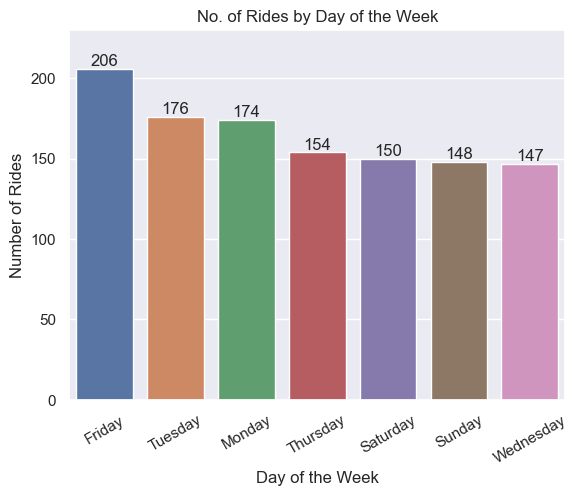

In [12]:
temp = df.groupby('DAY_OF_WEEK', as_index=False).count().sort_values('START_DATE', ascending=False)
plot1 = sns.barplot(data=temp,
                    x='DAY_OF_WEEK',
                    y='START_DATE')

for i in plot1.containers:
    plot1.bar_label(i,)

plot1.set(ylim=(0,230))
plot1.tick_params(axis="x", rotation=30)
plot1.set(ylabel='Number of Rides',
          xlabel='Day of the Week',
          title='No. of Rides by Day of the Week')

plt.show()

#### 2. Are business or personal trips more common? How much do they differ?
Business trips form the majority of the trips taken. There may be a potential market segment for personal trips that Uber can tap into while simultaneously solidifying its moat in the Business trips segment.

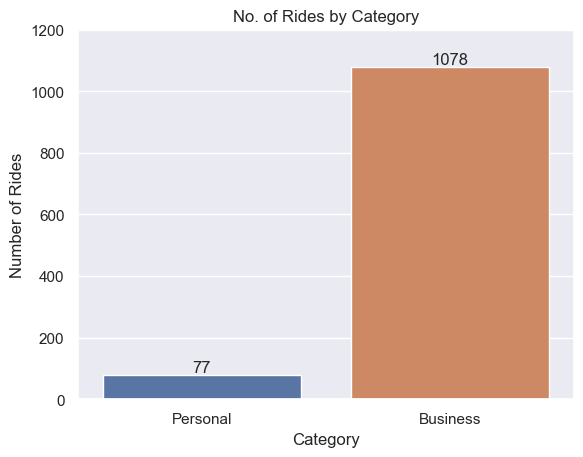

In [13]:
temp = df.groupby('CATEGORY', as_index=False).count().sort_values('START_DATE')
plot2 = sns.barplot(data=temp,
                   x='CATEGORY',
                   y='START_DATE')

for i in plot2.containers:
    plot2.bar_label(i,)
    
plot2.set(ylim=(0,1200))
plot2.set(ylabel='Number of Rides',
          xlabel='Category',
          title='No. of Rides by Category')

plt.show()

#### 3. What are the most common reasons why Uber's customers use the service?
As suspected, most rides have no purpose being indicated. However, the next 3 purposes are aligned with business trips. This validates a hypothesis that Uber lacks in being engaged with the Personal trips market segmentt.

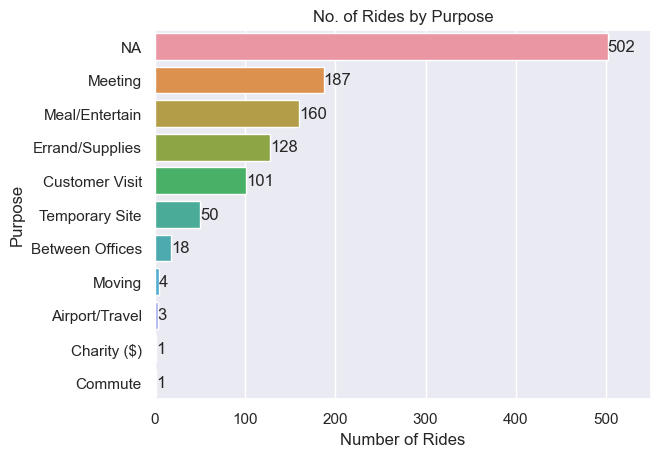

In [24]:
temp = df.groupby('PURPOSE', as_index=False).count().sort_values('START_DATE', ascending=False)
plot3 = sns.barplot(data=temp,
                    x='START_DATE',
                    y='PURPOSE')

for i in plot3.containers:
    plot3.bar_label(i,)
    
plot3.set(xlabel='Number of Rides',
          ylabel='Purpose',
          xlim=(0,550),
          title='No. of Rides by Purpose')

plt.show()

#### 4a. How far is a typical trip, without outliers?
We observe that the median distance for Uber trips is about 6 miles. The interquartile range is between roughly 3 to 10.5 miles. This serves as an insight that the customers typically request for rides that are not long-distance rides and are focused more on convenience.

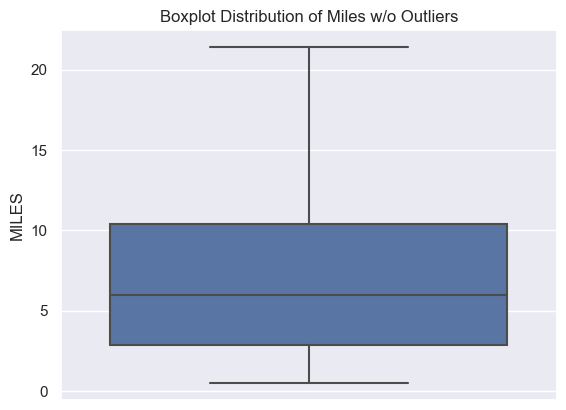

In [25]:
plot4 = sns.boxplot(data=df,
            y='MILES',
            showfliers=False)

plot4.set(title='Boxplot Distribution of Miles w/o Outliers')

plt.show()

#### 4b. How long are rides typically?


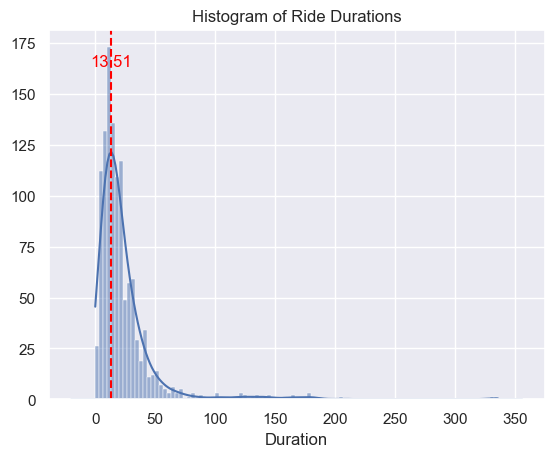

In [27]:
plot11 = sns.histplot(data=df,
             x='DURATION',
             kde=True)

# calculate peak of kde
kde = sns.kdeplot(df['DURATION'],
                  bw_adjust=1)

peak_x = kde.get_lines()[0].get_data()[0][kde.get_lines()[0].get_data()[1].argmax()]

plt.axvline(x=peak_x,
            color='red',
            linestyle='--')
plt.text(peak_x,
         plt.gca().get_ylim()[1]*0.9,
         f'{peak_x:.2f}',
         color='red',
         ha='center')

plot11.set(title='Histogram of Ride Durations',
          xlabel="Duration",
          ylabel="")

plt.show()

#### 5a. Where should Uber place most of its drivers?
Excluding "Unknown Location", Uber should consider situating more drivers at these locations to ensure that there is sufficient supply to meet demand. After all, demand that is not met is lost opportunity. 

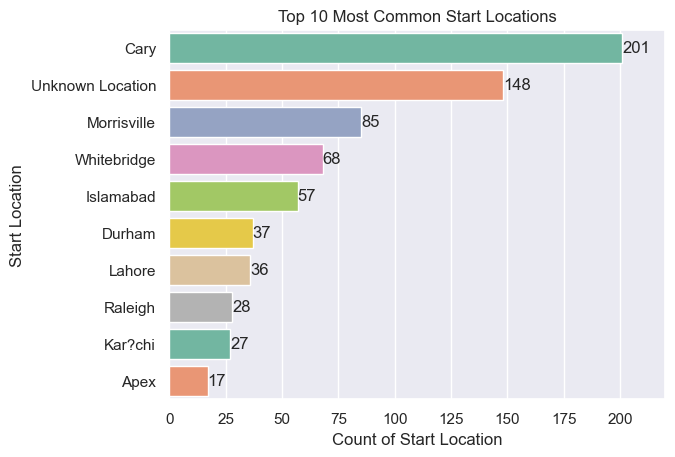

In [28]:
temp = df.groupby(['START'], as_index=False).size().sort_values('size', ascending=False)
temp = temp.head(10)

plot6 = sns.barplot(
    data=temp,
    y='START',
    x='size',
    palette="Set2"
    )

for i in plot6.containers:
    plot6.bar_label(i,)
    
plot6.set(xlim=(0,220),
    xlabel='Count of Start Location',
    ylabel='Start Location',
    title='Top 10 Most Common Start Locations'
    )

plt.show()

#### 5b. Which are the most common destinations?

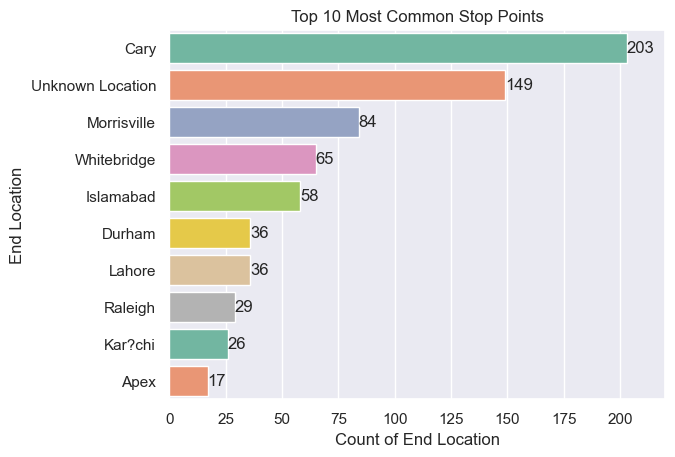

In [17]:
temp = df.groupby(['STOP'], as_index=False).size().sort_values('size', ascending=False)
temp = temp.head(10)

plot7 = sns.barplot(
    data=temp,
    y='STOP',
    x='size',
    palette="Set2"
    )

for i in plot7.containers:
    plot7.bar_label(i,)
    
plot7.set(xlim=(0,220),
    xlabel='Count of End Location',
    ylabel='End Location',
    title='Top 10 Most Common Stop Points'
    )

plt.show()

#### 5c. What are the most common trips taken?

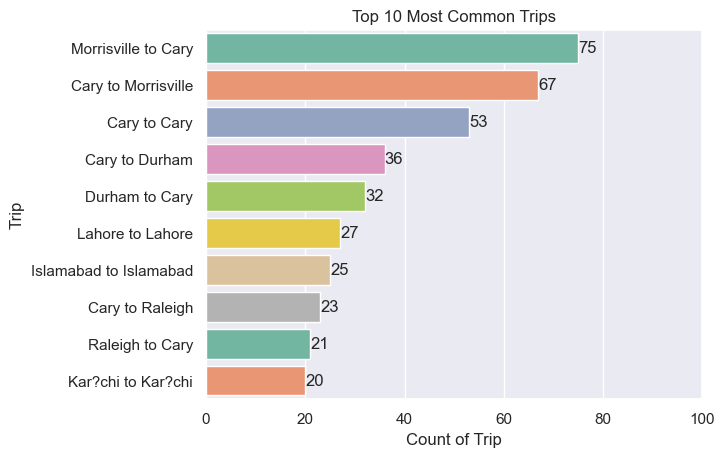

In [18]:
temp = df.groupby(['TRIP'], as_index=False).size().sort_values('size', ascending=False)
temp_filter = temp['TRIP'].str.contains('Unknown')
temp = temp[~temp_filter]
temp = temp.head(10)

plot8 = sns.barplot(
    data=temp,
    y='TRIP',
    x='size',
    palette="Set2"
    )

for i in plot8.containers:
    plot8.bar_label(i,)
    
plot8.set(xlim=(0,100),
    xlabel='Count of Trip',
    ylabel='Trip',
    title='Top 10 Most Common Trips'
    )

plt.show()

#### 6a. Which month should Uber prepare for a surge in demand or relax supply?
In 6., we dive into the data with respect to temporal factors.

The month of December has the highest demand while September has the lowest.

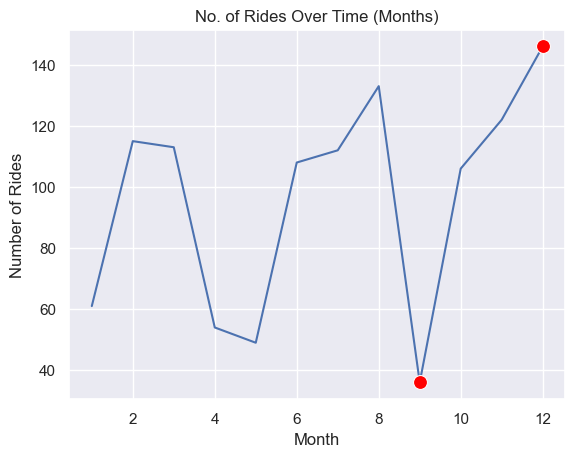

In [19]:
temp = df.groupby('MONTH_OF_YEAR', as_index=False).size()

plot9 = sns.lineplot(
    data=temp,
    x='MONTH_OF_YEAR',
    y='size',
    marker='o',
    markevery=[8,11],
    markerfacecolor='red',
    ms='10'
    )

plot9.set(xlabel='Month',
          ylabel='Number of Rides',
          title='No. of Rides Over Time (Months)')

plt.show()

#### 6b. When does demand surge during the day? i.e When should Uber incentivise drivers to work and riders to consume Uber's services?

Demand starts to rapidly rise from 7am and reaches its peak between 1pm to 5pm. During the peak period, price discrimination can be implemented to increase prices during this period, thereby generatin more revenue.

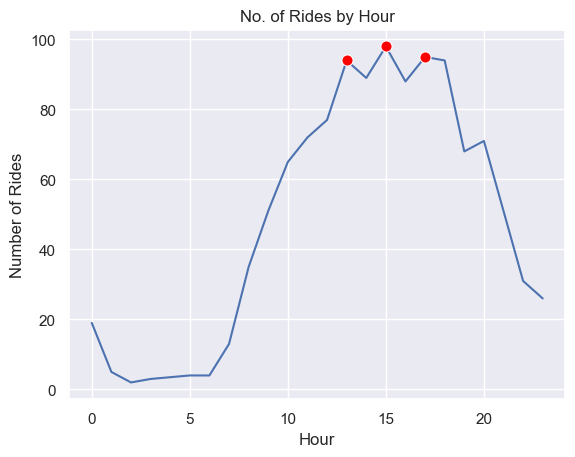

In [20]:
temp = df.groupby('START_HOUR', as_index=False).size()

plot10 = sns.lineplot(
    data=temp,
    x='START_HOUR',
    y='size',
    marker='o',
    markevery=[12,14,16],
    markerfacecolor='red',
    ms='8'
    )

plot10.set(xlabel='Hour',
          ylabel='Number of Rides',
          title='No. of Rides by Hour')

plt.show()

## Overall
The insights drawn from the visualisations can aid Uber in its strategic business planning. By understanding the type of customers and their behaviour, Uber can better craft initiatives or policies to suit its current customers. In addition, knowing what customer segment they have captured would also inform Uber of the customers segments that they have yet to capture. Understanding how demand varies over time also gives enables more efficient planning.